In [1]:
from pathlib import Path
import os

from astropy.nddata import CCDData
from astropy.visualization import hist
import ccdproc as ccdp
import matplotlib.pyplot as plt
import numpy as np

from convenience_functions import show_image

from astropy.stats import mad_std

In [2]:
reduced_path=Path("zchao")
bs_path=Path("bs")
ff_path=Path('ff')
obj_path=Path("obj")

In [3]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning, append=True)
from astropy.utils.exceptions import AstropyWarning
warnings.simplefilter('ignore', category=AstropyWarning)

In [4]:
bs_files=ccdp.ImageFileCollection(bs_path)
ff_files=ccdp.ImageFileCollection(ff_path)
obj_files=ccdp.ImageFileCollection(obj_path)
reduced_files=ccdp.ImageFileCollection(reduced_path)

In [5]:
bs_files.summary['file','det-id','bin-fct1']

file,det-id,bin-fct1
str17,int64,int64
FCSA00209447.fits,1,2
FCSA00209449.fits,1,2
FCSA00209451.fits,1,2
FCSA00209453.fits,1,2
FCSA00209455.fits,1,2


ovcol=create_region(4,lend1=260,rend1=275,lend2=277,rend2=292,lend3=812,rend3=827,lend4=830,rend4=845)

# Bias subtraction and only region 1 left

In [6]:
for ccd, filename in bs_files.ccds(return_fname=True):
    ccd=ccdp.subtract_overscan(ccd, overscan=ccd[:,260:275],median=True)
    ccd=ccdp.trim_image(ccd[:,4:260])
    ccd.write(reduced_path / filename,overwrite=True)

In [7]:
reduced_files.refresh()
bs_key={'data-typ':'BIAS'}
rd_bs_fname=reduced_files.files_filtered(**bs_key,include_path=True)

In [8]:
combined_bias=ccdp.combine(rd_bs_fname,
                           method='average',
                           sigma_clip=True, sigma_clip_low_thresh=5, sigma_clip_high_thresh=5,
                           sigma_clip_func=np.ma.median, sigma_clip_dev_func=mad_std)
combined_bias.meta['combined']=True
combined_bias.write(reduced_path / 'std_bias.fits',overwrite=True)

# Get the Flat, only region 1 left. 

But there exist some pixels whose values is less than 0

In [9]:
for ccd, filename in ff_files.ccds(return_fname=True):
    ccd=ccdp.subtract_overscan(ccd, overscan=ccd[:,260:275],median=True)
    
    ccd=ccdp.trim_image(ccd[:,4:260])
    
    ccd=ccdp.subtract_bias(ccd, combined_bias)
    
    ccd.write(reduced_path / filename, overwrite=True)

INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.

INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.

INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.

INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.



INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]
INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]
INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]
INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]


INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.



INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]


In [10]:
reduced_files.refresh()
ff_key={'data-typ':'DOMEFLAT'}
rd_ff_fname=reduced_files.files_filtered(**ff_key,include_path=True)

In [11]:
def inv_median(a):##now we try to follow the iraf pipline
    return 1 / np.median(a)
combined_flat=ccdp.combine(rd_ff_fname,
                           method='average', scale=inv_median,
                           sigma_clip=True, sigma_clip_low_thresh=5, sigma_clip_high_thresh=5,
                           sigma_clip_func=np.ma.median, signma_clip_dev_func=mad_std)

INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.

INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.

INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.

INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.

INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcs

INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]
INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]
INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]
INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]
INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTy

INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.

INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.

INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.



INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]
INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]
INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]


In [12]:
combined_flat.meta['combined']=True
combined_flat.write(reduced_path / "flat.fits",overwrite=True)

# Deal with the obj

In [13]:
raw_ccd=list()
reduced_ccd=list()
for ccd, filename in obj_files.ccds(return_fname=True):
    raw_ccd.append(ccd)
    ccd=ccdp.subtract_overscan(ccd, overscan=ccd[:,260:275],median=True)
    ccd=ccdp.trim_image(ccd[:,4:260])
    ccd=ccdp.subtract_bias(ccd,combined_bias)
    ccd=ccdp.flat_correct(ccd, combined_flat)
    reduced_ccd.append(ccd)
    ccd.write(reduced_path / filename, overwrite=True)

INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.

INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.



INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]
INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]


INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.

INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.

INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.



INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]
INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]
INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]


INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.



INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]


In [14]:
for i, ccd in enumerate(reduced_ccd):
    obji="obj{}.fits".format(i+1)
    ccd=ccdp.trim_image(ccd[9:4200,22:99])
    ccd.meta['trimed']=True
    ccd.write(reduced_path / obji,overwrite=True)

In [69]:
from astropy import units as u
reduced_files.refresh()
#new_ccd_ls=[]
#ccd_ls=[]
for i, ccd in enumerate(reduced_files.ccds(trimed=True,cr=None)):
    objname="obj{}_cr.fits".format(i+1)
    #ccd_ls.append(ccd)
    new_ccd=ccdp.cosmicray_lacosmic(ccd,gain=2, readnoise=4, sigclip=4.5, sigfrac=0.5, objlim=1,niter=4)
    new_ccd.data=np.array(new_ccd.data)
    new_ccd.unit=u.adu
    new_ccd.meta['cr']=True
    new_ccd.write(reduced_path / objname,overwrite=True)

INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.

INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.



INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]
INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]


INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.

INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.



INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]
INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]


INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.

INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.



INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]
INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]


In [16]:
lamp_arc=CCDData.read('wc/FCSA00209469.fits')

INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.



INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]


In [17]:
pixel_up=500
pixel_bottom=3500
arc=ccdp.trim_image(lamp_arc[pixel_up:pixel_bottom,4:265])

In [18]:
cl_col=70
from scipy.signal import find_peaks
flux=arc[:,cl_col]
peaks,_=find_peaks(flux.data, height=2*np.median(flux))

In [19]:
peaks=peaks[np.argsort(flux.data[peaks])][::-1]

In [21]:
peaks=peaks[:14]

In [22]:
peaks=np.sort(peaks)

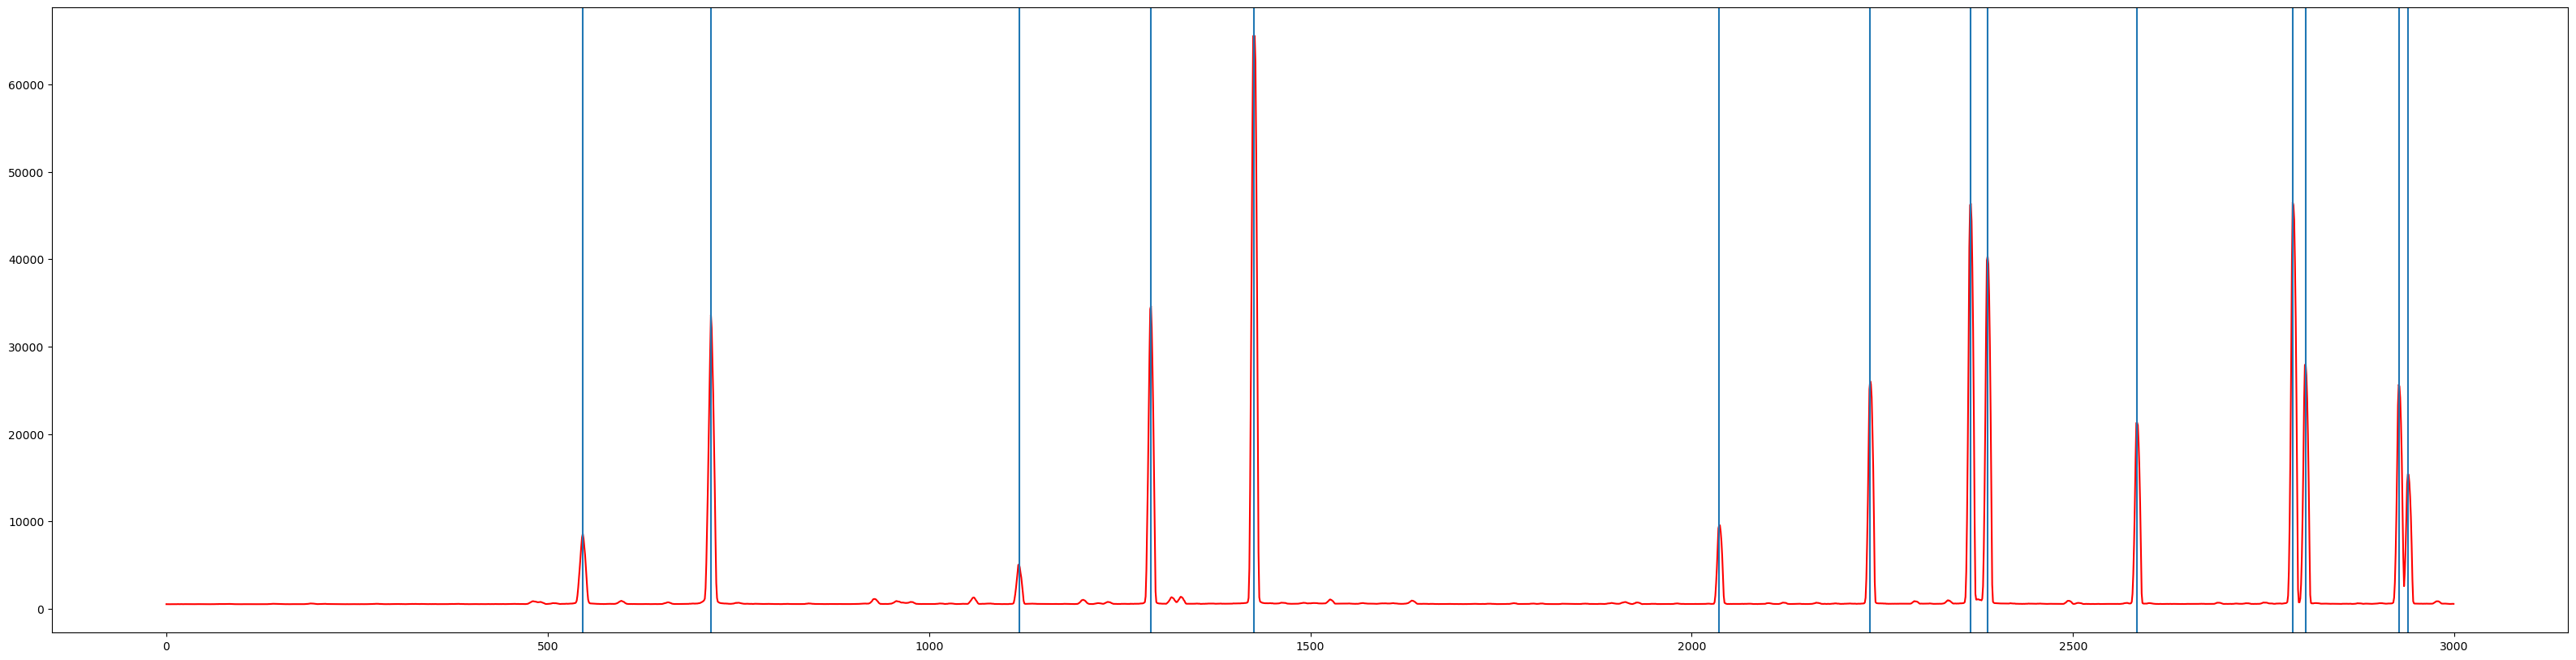

In [23]:
plt.figure(figsize=(40,10))
plt.plot(flux.data,'r')
for i in peaks:
    plt.axvline(i)

In [24]:
num_verify=2
peaks_fit=peaks[num_verify:]
peaks_wl=[9354.2198, 9324.4992, 9122.9674, 8667.9442, 8521.4422, 8424.6475, 8408.2096, 8264.5225,8115.3110,8103.6931, 8014.7657, 8006.1567 ]

Chebyshev coefficients:  8685.461049433337 - 693.2115133552395·T₁(x) + 17.397100723433184·T₂(x) -
0.9727832229342455·T₃(x) - 14.684963526073131·T₄(x) +
17.311841751066975·T₅(x)
Chebyshev coefficients:  [ 1.01706508e+04 -7.37224834e-01]


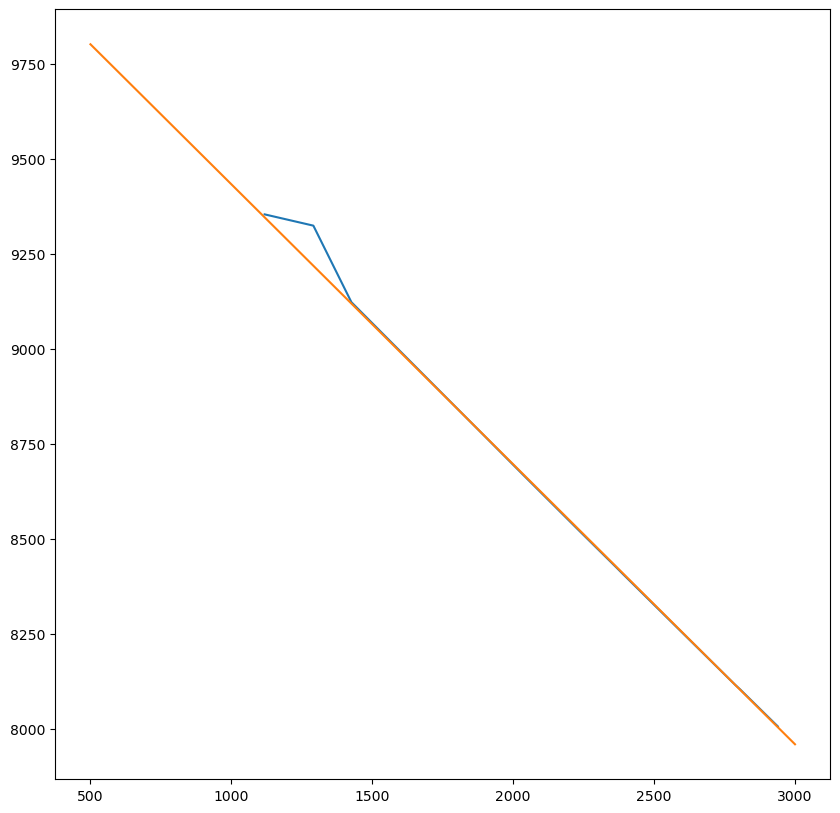

In [25]:
plt.figure(figsize=(10,10))
plt.plot(peaks_fit,peaks_wl)
order=5
from numpy.polynomial import Chebyshev
coeffs = Chebyshev.fit(peaks_fit,peaks_wl,order)
print("Chebyshev coefficients: ", coeffs)
from astropy.modeling import models, fitting
Chebyshev_model=models.Chebyshev1D(degree=1)
fitter=fitting.LevMarLSQFitter()
result=fitter(Chebyshev_model, peaks_fit[2:], peaks_wl[2:])
print("Chebyshev coefficients: ", result.parameters)
plt.plot(np.linspace(500,3000,100),result(np.linspace(500,3000,100)))

In [106]:
from numpy.polynomial import Polynomial

degree=3

reduced_files.refresh()
pixel_left=10
pixel_right=70
bkg=[]
shift_list=[-5,0,5]*2
bg_name=[]
for i, ccd in enumerate(reduced_files.ccds(cr=True,bg_sub=None)):
    objname="obj{}_bg.fits".format(i+1)
    coord_shift=shift_list[i]
    ccd=ccdp.trim_image(ccd[pixel_up:pixel_bottom,pixel_left-coord_shift:pixel_right-coord_shift])
    bkg.append(ccd)
    #fit the background with the known column
    background=np.zeros_like(ccd.data)
    known_col=np.concatenate([np.arange(25),np.arange(35,60)])
    for row in range(ccd.data.shape[0]):
        known_flux=ccd[row,known_col]
        poly=Polynomial.fit(known_col,known_flux,deg=degree)
        background[row]=poly(np.arange(60))
        
    ccd.data=ccd.data-background
    ccd.meta['bg_sub']=True
    ccd.write(reduced_path / objname,overwrite=True)
    bg_name.append("zchao/"+objname)
        

INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.



INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]


INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.



INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]


INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.



INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]


INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.



INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]


INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.



INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]


INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.



INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]


In [107]:
combined_obj=ccdp.combine(bg_name,method='median')
combined_obj.write("final.fits",overwrite=True)

INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.

INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.

INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.

INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.

INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcs

INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]
INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]
INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]
INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]
INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTy

214


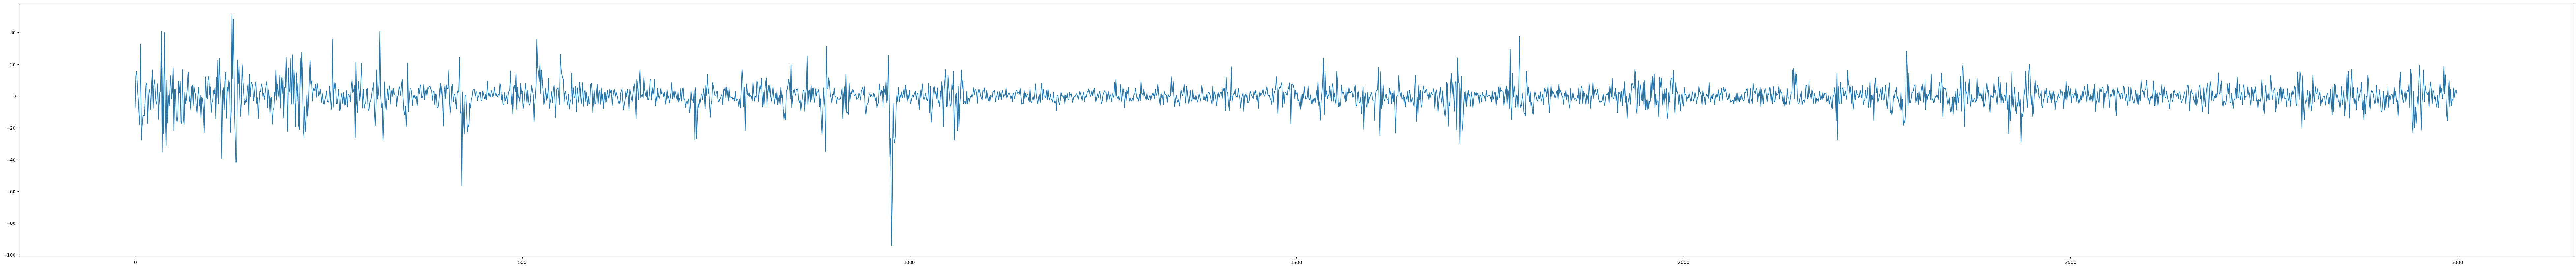

In [101]:
print(np.argmax(np.average(ccd.data,axis=1)))
plt.figure(figsize=(100,10))
plt.plot(combined_obj.data[:,30])


In [52]:
mymask=np.median(testccd1,axis=1)<10*test_med1

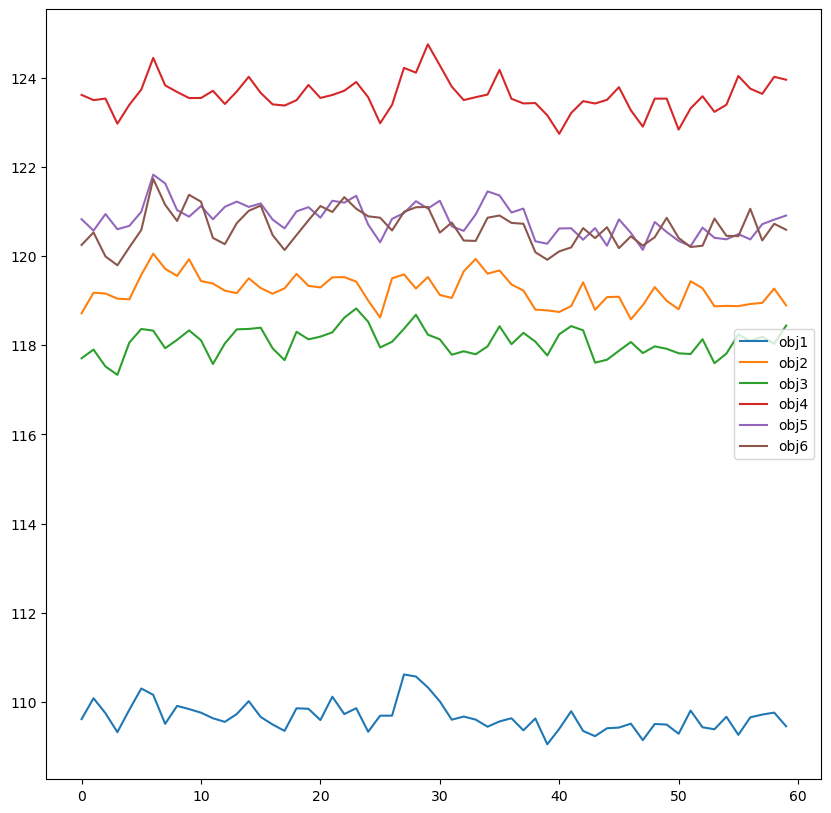

In [55]:
plt.figure(figsize=(10,10))
for i in range(6):
    tesccd=bkg[i]
    test_med=np.median(tesccd)
    mymask=np.median(tesccd,axis=1)<10*test_med
    plt.plot(np.mean(tesccd[mymask], axis=0), label="obj{}".format(i+1))
plt.legend()

In [31]:
from numpy.polynomial import Polynomial
degree=3
background=np.zeros_like(testccd.data)
known_col=np.concatenate([np.arange(20),np.arange(35,60)])
for i in range(testccd_nm.shape[0]):
    known_flux=testccd[i,known_col]
    poly=Polynomial.fit(known_col,known_flux,deg=degree)
    background[i]=poly(np.arange(60))
    

In [35]:
testccd.data=testccd.data-background
testccd.write('bkgtest.fits',overwrite=True)

In [132]:
print(testccd.data.shape)
print("\n", np.median(testccd.data,axis=1).shape)

(3000, 60)

 (3000,)


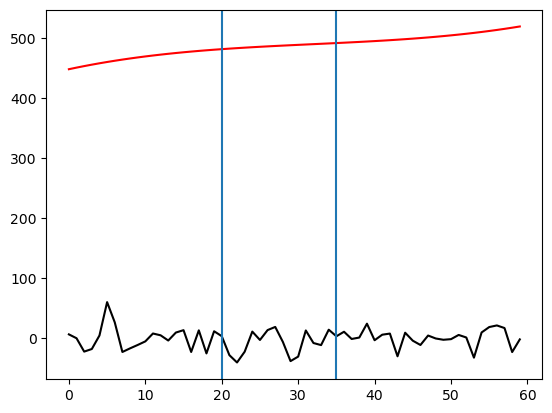

In [36]:
plt.plot(background[1800],'r')
plt.plot(testccd.data[1800],'k')
plt.axvline(20)
plt.axvline(35)

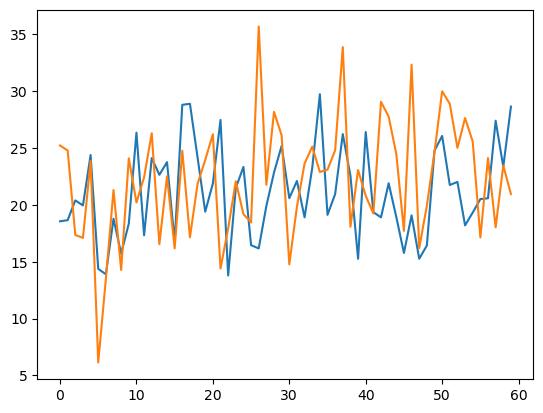

In [133]:
plt.plot(testccd.data[1200])
plt.plot(testccd.data[1300])

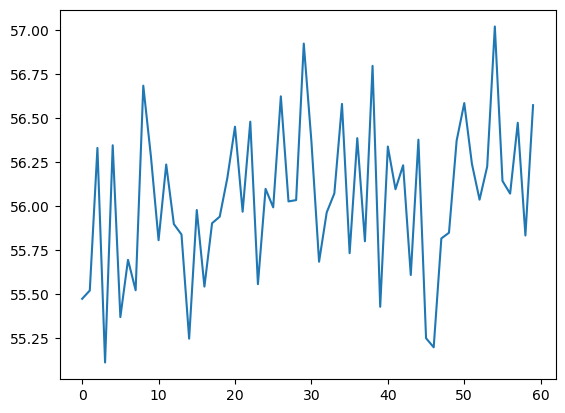

In [128]:
plt.plot(np.median(testccd,axis=0))

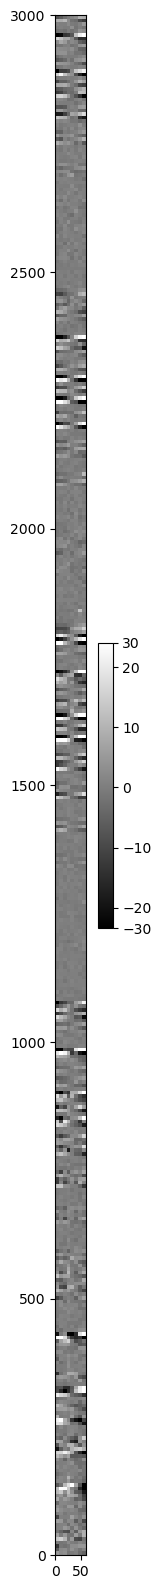

In [78]:
testccd.write('a.fits')

In [79]:
sky=CCDData.read('sky.fits')

INFO:astropy:An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.



INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]


In [84]:
col=70
peaks,_=find_peaks(sky.data[500:3500,col],height=2*np.median(sky))
peaks=peaks[np.argsort(sky.data[500:3500,col][peaks])][::-1][:10]

In [83]:
peaks

array([ 977,  129, 1710,  892,  842,  220, 1585,  424,  202, 1060])

In [85]:
peaks

array([ 978,  129, 1710,  220,  842,  892, 1586,  425, 1061,  202])

In [31]:
import numpy as np

# Create the original array
arr = np.random.rand(1000, 60)

# Define the indices of the known columns
known_cols = np.concatenate([np.arange(30), np.arange(40, 60)])

# Create a new array containing only the rows corresponding to the known columns
known_arr = arr[:, known_cols]

# Compute the DFT of the new array along axis 1
dft = np.fft.fft(known_arr, axis=1)

# Compute the frequency components of the signal along axis 1
freqs = np.fft.fftfreq(known_arr.shape[1])

# Define the indices of the middle columns
mid_cols = np.arange(30, 40)

# Iterate over each middle column
for col in mid_cols:
    # Compute the estimated amplitudes and phases of the frequency components
    amps = np.abs(dft[:, col - known_cols[0]])
    phases = np.angle(dft[:, col - known_cols[0]])

    # Use the estimated amplitudes and phases to calculate the missing values in the middle column
    values = np.zeros(known_arr.shape[0], dtype=np.complex)
    for i in range(len(freqs)):
        if abs(freqs[i]) > 0.01:  # ignore DC component
            values += amps[i] * np.exp(1j * 2 * np.pi * freqs[i] * (col - known_cols[0]) + phases[i])

    # Insert the interpolated values into the appropriate location in the original array
    arr[:, col] = np.real(values)

# Print the final array
print(arr)


[[0.39527765 0.38271115 0.42720609 ... 0.30405374 0.52306088 0.85623978]
 [0.42278292 0.23000087 0.36099001 ... 0.06143611 0.46430525 0.84527433]
 [0.96872541 0.71909163 0.3408454  ... 0.80643291 0.04015454 0.93414198]
 ...
 [0.12628784 0.86277375 0.50465475 ... 0.59976929 0.46160037 0.26763236]
 [0.20262389 0.10184555 0.30601026 ... 0.92269773 0.67360816 0.03614747]
 [0.92651847 0.94352308 0.66829707 ... 0.44595981 0.61440483 0.55303169]]


/tmp/ipykernel_3704/4226813215.py:28: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  values = np.zeros(known_arr.shape[0], dtype=np.complex)


In [32]:
arr = np.random.rand(1000, 60)
arr[:,30:40]=np.nan

In [33]:
np.fft.fft(arr,axis=1)

array([[nan +0.j, nan+nanj, nan+nanj, ..., nan+nanj, nan+nanj, nan+nanj],
       [nan +0.j, nan+nanj, nan+nanj, ..., nan+nanj, nan+nanj, nan+nanj],
       [nan +0.j, nan+nanj, nan+nanj, ..., nan+nanj, nan+nanj, nan+nanj],
       ...,
       [nan +0.j, nan+nanj, nan+nanj, ..., nan+nanj, nan+nanj, nan+nanj],
       [nan +0.j, nan+nanj, nan+nanj, ..., nan+nanj, nan+nanj, nan+nanj],
       [nan +0.j, nan+nanj, nan+nanj, ..., nan+nanj, nan+nanj, nan+nanj]])

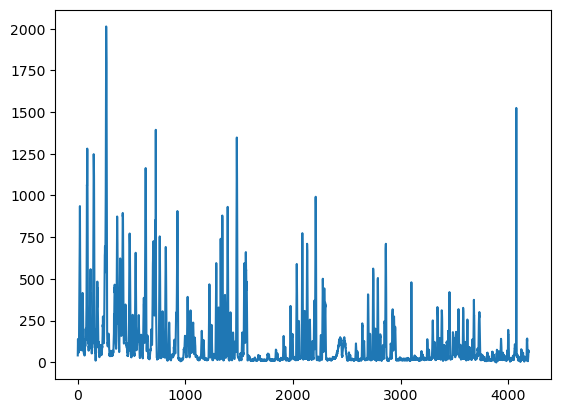

In [34]:
plt.plot(ccd.data[:,20])